In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/Car Sales.xlsx - car_data.csv")

Data Exploration

In [ ]:
columns_names = data.columns

In [ ]:
print(columns_names)

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')


In [ ]:
dimension = data.shape
print(dimension)

(23906, 16)


In [ ]:
print(data.head(5))

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

Data Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 1. Count the number of customers by gender
gender_counts = data['Gender'].value_counts()
print("Number of customers by gender:")
print(gender_counts)

# 2. Analyze the average price by gender
avg_price_by_gender = data.groupby('Gender')['Price ($)'].mean()
print("\nAverage car price by gender:")
print(avg_price_by_gender)

Number of customers by gender:
Gender
Male      18798
Female     5108
Name: count, dtype: int64

Average car price by gender:
Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64


<ipython-input-47-9fb6adac1d48>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='viridis')


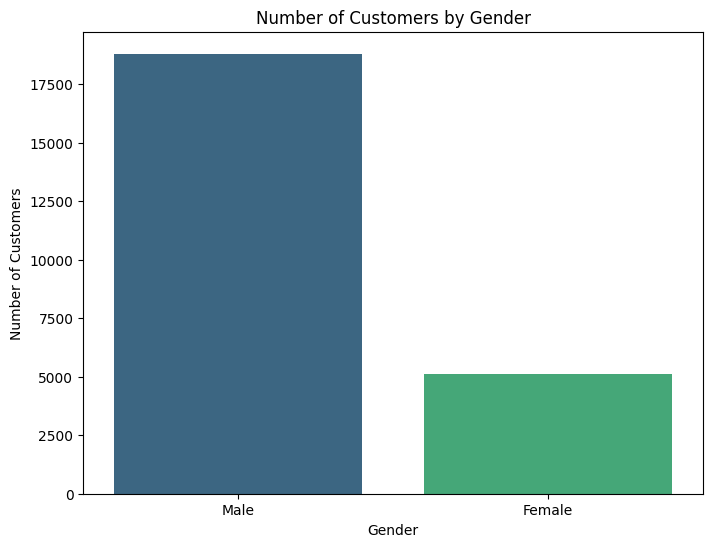

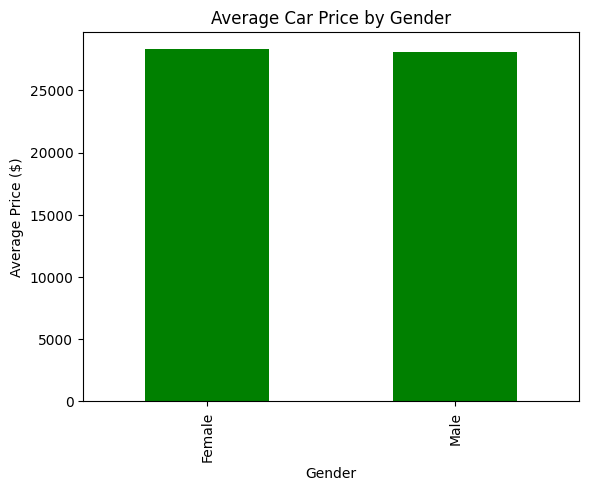

In [ ]:
# 4. Visualize number of customers by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='viridis')
plt.title('Number of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

# 5. Visualize average car price by gender
avg_price_by_gender.plot(kind='bar', color='green', title="Average Car Price by Gender")
plt.ylabel('Average Price ($)')
plt.xlabel('Gender')
plt.show()



1. Male buy more vehicles compared to Females.
2. Male and Female average income is approximately the same.
3. This shows that with same income , males are more likely to buy a vehicle compared to Females.


Mean Squared Error: 211733066.13137954


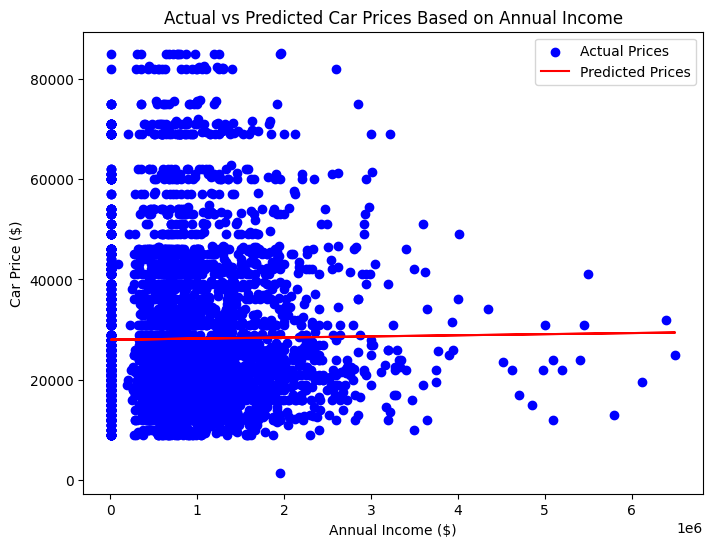

In [ ]:
# Select only the required columns: Annual Income and Price
data = data[['Annual Income', 'Price ($)']]

# Define Features and Target
X = data[['Annual Income']]  # Feature (Annual Income)
y = data['Price ($)']        # Target (car price)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize the actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Annual Income ($)')
plt.ylabel('Car Price ($)')
plt.title('Actual vs Predicted Car Prices Based on Annual Income')
plt.legend()
plt.show()

Tagerted annual income group should be $100000

The desired car price should be around $20000